In [117]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [118]:
def showImage(image,title):
    plt.title(title)
    plt.axis('off')
    plt.imshow(image)
    plt.show()

# Description_Question-1

First we have to Read both images and store them as  image1 and image2.Then apply the AND operation between them to get only the overlap area and display it.As shown below,after applying AND operation the white portion in the resultant shows the overlap region. then we have to just count number of white pixels in the image that represents the area of overlap in the form pixels

# Qustion-1

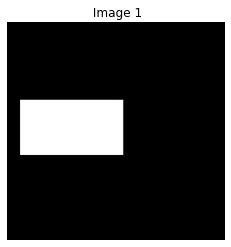

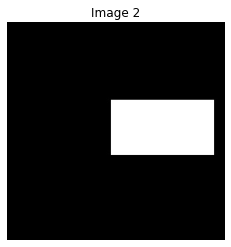

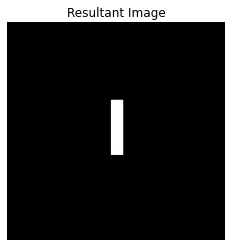

In [119]:
# read the image1
image1_1 = cv2.imread("Q-1a.jpg")
# read the image2
image1_2 = cv2.imread("Q-1b.jpg")
#display images
showImage(image1_1," Image 1")
showImage(image1_2,"Image 2")
# Take aand operation between both images two extract overlapping area between both the images
img_bwa = cv2.bitwise_and(image1_1,image1_2)
# display the overlap area
showImage(img_bwa,"Resultant Image")

In [120]:
# iterate loop over the last image too find the number of white pixels, which are actually the  area of overlaping area
cnt=0
for i in img_bwa:
    for j in i:
        for k in j:
            if k>250:
                cnt=cnt+1
print("Number of Overlapping pixels are " + str(cnt))

Number of Overlapping pixels are 3873


# Question2_Description

First simply import the image in an rgb mode and  then convert into gray scale using open cv and plot it using matplot. Then,we apply the binary threshold by setting value to 225 so that hand in an image can be easily seprate from the rest of the image background.Then using opencv function "cv2.findContours" , we have created a boundary around the hand usually known as contour.Then at last to find the parameter we have just find the length of the contour drawn which is the perimeter of the hand and then usinf put function simply draw the perimeter on the hand.

# Question-2

In [121]:
# read the image
image2 = cv2.imread("Q-2.jpg")

In [122]:
# convert to RGB
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

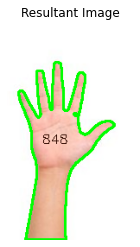

In [123]:
# create a binary thresholded image
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image2 = cv2.drawContours(image2, contours, -1, (0, 255, 0), 2)
cnt = contours[0]
# find the length of contour,which is the perimeter of hand
perimeter = int(cv2.arcLength(cnt,True))
# display the perimeter on hand
myImg=cv2.putText(image2,str(perimeter),(40,140),cv2.FONT_HERSHEY_SIMPLEX,0.5,(50,10,0),1)
showImage(myImg,"Resultant Image")

# Question3_Description

First we import the image as img3 then apply gaussian to blur the image for better edge detection. Then to find the edges we take a window of size 5x5 and apply sobel operator both in x and y direction. After then we apply thresholding to finite the edges and find only the diagnal edges only. so that it become easy to calculate the area by just getting the x,y cordinates of diagnal pixels.I have found top left corner cordinates as (50,33) and bottom right as (90,105) , so to find area I simply doo y2-y1 and x2-x1 and  I got height and width of rectangle and then simply I multiply them ang got area which is approximately 2880 pixels , which is the area of rectangle.

# Question-3

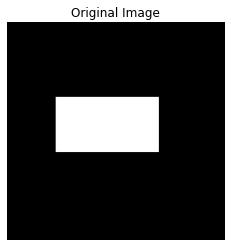

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


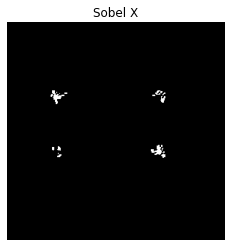

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


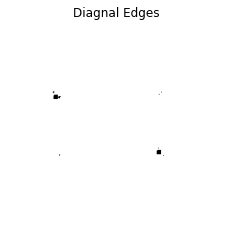

In [124]:
# Read the original image
img3 = cv2.imread('Q-3.jpg', cv2.COLOR_RGB2GRAY)
showImage(img3,"Original Image")
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img3, (3,3), 0) 
# Sobel Edge Detection
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Image
showImage(sobelxy,"Sobel X")
# binary thresholding
_, binary = cv2.threshold(sobelxy,10,220, cv2.THRESH_BINARY_INV)
showImage(binary,"Diagnal Edges")

In [125]:
# find the cordinates of  diagnol pixels
img= cv2.resize(binary,(150,150)) 
x,y,z= img.shape
for i in range(x):  
    for j in range(y):  
        if img[i,j,0]==0: 
            print("Found pixel at ",i,j)

Found pixel at  50 33
Found pixel at  50 34
Found pixel at  51 32
Found pixel at  51 33
Found pixel at  51 34
Found pixel at  52 32
Found pixel at  52 33
Found pixel at  52 34
Found pixel at  88 104
Found pixel at  88 105
Found pixel at  89 103
Found pixel at  89 104
Found pixel at  89 105
Found pixel at  90 103
Found pixel at  90 104
Found pixel at  90 105


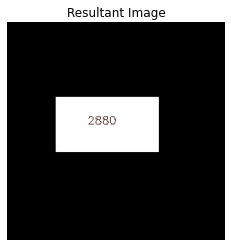

In [126]:
#  have found top left corner cordinates as (50,33) and bottom right as (90,105) ,
# so to find area I simply doo y2-y1 and x2-x1 and I got height and width of rectangle and 
# then simply I multiply them ang got area which is approximately 2880 pixels ,
# which is the area of rectangle.
height=105-33
width=90-50
area=height*width
myImg=cv2.putText(img3,str(area),(110,140),cv2.FONT_HERSHEY_SIMPLEX,0.5,(50,10,0),1)
showImage(myImg,"Resultant Image")

# Question4_Description

First we import image as img3 and then we find  all the edges in the image using canny edge detector by taking 3x3 window then to detect  the horizontal lines only we have to use hough line transform method.We have  set the minimum line length value to 100 and maximum line gap as 80.Then we choose red color to highlight the horizontal lines. Then we subtract the gained image from the original image to remove irrelevant or extra noice and then we apply the thresholding to finite the lines and make the results clear.

# Question-4

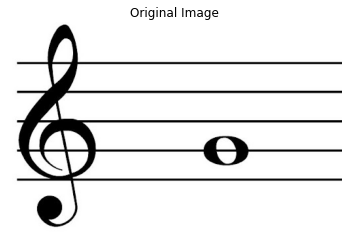

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


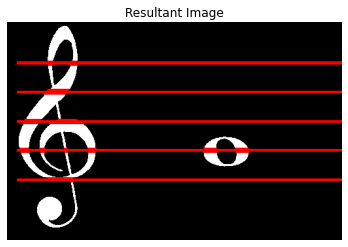

In [127]:
# read image
img4 = cv2.imread('Q-4.jpg')
# detect edges using canny
edges = cv2.Canny(img4,50,150,apertureSize = 3)
# set minimum line length
minLineLength=100
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=200,lines=np.array([]), minLineLength=minLineLength,maxLineGap=80)
# extract r,g,b values and store as a,b,c respectively
a,b,c = lines.shape
for i in range(a):
#     draw red line on the horizontal line detected
    cv2.line(im, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (255,0,0),3, cv2.LINE_AA)
# display image
showImage(img4,"Original Image")
# subtract the gain image from the original to remove extra noise or irrelevant lines
img=im-img4
# apply binary thresholding to finite the horizontal lines
_, binary = cv2.threshold(img,8,200, cv2.THRESH_BINARY)
# display the resultant image
showImage(binary,"Resultant Image")